In [65]:
import matplotlib.pyplot as plt
import pandas as pd
from path import Path

In [66]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [73]:
# Load data
file_path=Path("chocolate_version2.csv")
chocolate_df = pd.read_csv(file_path)

chocolate_df.head()

,company_location,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,U.S.A,Madagascar,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
1,U.S.A,Dominican republic,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2,U.S.A,Tanzania,76.0,3.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
3,France,Peru,63.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
4,France,Bolivia,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


In [71]:
uniqueCompLoc=chocolate_df['company_location'].unique()
print(uniqueCompLoc)

['U.S.A' 'France' 'Fiji' 'Vanuatu' 'Ecuador' 'Mexico' 'Switzerland'
 'Netherlands' 'Spain' 'Peru' 'Canada' 'Italy' 'Brazil' 'Nicaragua' 'U.k.'
 'Australia' 'Philippines' 'Wales' 'Belgium' 'Vietnam' 'Germany'
 'Singapore' 'Venezuela' 'Malaysia' 'Russia' 'South korea' 'Taiwan'
 'Puerto rico' 'Colombia' 'Japan' 'New zealand' 'Costa rica' 'Hungary'
 'Scotland' 'Martinique' 'Sao tome' 'St. lucia' 'Guatemala' 'South africa'
 'Dominican republic' 'Sao tome & principe' 'Bolivia' 'Portugal' 'Norway'
 'Denmark' 'Grenada' 'Israel' 'India' 'St.vincent-grenadines'
 'Czech republic' 'Thailand' 'Finland' 'Madagascar' 'Sweden' 'Poland'
 'Austria' 'Honduras' 'U.a.e.' 'Lithuania' 'Ireland' 'Chile' 'Ghana'
 'Iceland' 'Argentina' 'Suriname' 'El salvador']


In [69]:
uniqueBeanOrigin=chocolate_df['country_of_bean_origin'].unique()
print(uniqueBeanOrigin)

['Madagascar' 'Dominican republic' 'Tanzania' 'Peru' 'Bolivia' 'Venezuela'
 'Ecuador' 'Brazil' 'Papua new guinea' 'Burma' 'Panama' 'Colombia' 'Cuba'
 'Togo' 'Sao tome' 'Mexico' 'Fiji' 'Vanuatu' 'Indonesia' 'Trinidad'
 'Vietnam' 'Nicaragua' 'Ghana' 'Belize' 'Blend' 'Grenada' 'Jamaica'
 'Guatemala' 'Costa rica' 'Honduras' 'Haiti' 'India' 'Congo' 'Philippines'
 'Solomon islands' 'Uganda' 'Malaysia' 'Sri lanka' 'Ivory coast' 'Gabon'
 'Taiwan' 'Puerto rico' 'Martinique' 'St. lucia' 'Australia' 'Liberia'
 'Sierra leone' 'Nigeria' 'U.s.a.' 'St.vincent-grenadines' 'Thailand'
 'Tobago' 'Bolvia' 'Sumatra' 'El salvador' 'Cameroon' 'Samoa'
 'Sao tome & principe' 'Principe' 'Sulawesi' 'Suriname' 'Dr congo']


In [70]:
chocolate_df['company_location'].value_counts(normalize=True)

U.S.A                    0.426259
France                   0.075090
Canada                   0.071043
U.k.                     0.052608
Italy                    0.030126
                           ...   
Wales                    0.000450
Ghana                    0.000450
St.vincent-grenadines    0.000450
Russia                   0.000450
Suriname                 0.000450
Name: company_location, Length: 66, dtype: float64

In [24]:
chocolate_df['company_location'].value_counts()

U.S.A                    948
France                   167
Canada                   158
U.k.                     117
Italy                     67
                        ... 
Wales                      1
Ghana                      1
St.vincent-grenadines      1
Russia                     1
Suriname                   1
Name: company_location, Length: 66, dtype: int64

In [25]:
chocolate_df['country_of_bean_origin'].value_counts()

Venezuela                238
Peru                     207
Dominican republic       200
Ecuador                  194
Madagascar               157
                        ... 
Tobago                     1
St.vincent-grenadines      1
Martinique                 1
Gabon                      1
Dr congo                   1
Name: country_of_bean_origin, Length: 62, dtype: int64

In [26]:
chocolate_df['country_of_bean_origin'].value_counts(normalize=True)

Venezuela                0.107014
Peru                     0.093076
Dominican republic       0.089928
Ecuador                  0.087230
Madagascar               0.070594
                           ...   
Tobago                   0.000450
St.vincent-grenadines    0.000450
Martinique               0.000450
Gabon                    0.000450
Dr congo                 0.000450
Name: country_of_bean_origin, Length: 62, dtype: float64

In [74]:
chocolate_df['company_location'] = chocolate_df['company_location'].astype('category')

others = chocolate_df['company_location'].value_counts().index[6:]
label = 'Other'

chocolate_df['company_location'] = chocolate_df['company_location'].cat.add_categories([label])
chocolate_df['company_location'] = chocolate_df['company_location'].replace(others, label)


In [75]:
#write custom encoder for company location
company_locations = {
    "U.S.A" : 1,
    "France": 2,
    "Canada": 3,
    "U.k.": 4,
    "Italy": 5,
"Belgium": 6,
   
    "Other": 7
}    

In [76]:
chocolate_df["company_location"] = chocolate_df["company_location"].apply(lambda x: company_locations[x])


In [77]:
chocolate_df.head(10)

,company_location,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,1,Madagascar,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
1,1,Dominican republic,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2,1,Tanzania,76.0,3.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
3,2,Peru,63.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
4,2,Bolivia,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
5,2,Venezuela,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
6,2,Peru,63.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
7,2,Ecuador,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
8,2,Peru,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
9,2,Brazil,70.0,3.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


In [78]:
#write custom encode for bean origin
chocolate_df['country_of_bean_origin'] = chocolate_df['country_of_bean_origin'].astype('category')

others = chocolate_df['country_of_bean_origin'].value_counts().index[6:]
label = 'Other'

chocolate_df['country_of_bean_origin'] = chocolate_df['country_of_bean_origin'].cat.add_categories([label])
chocolate_df['country_of_bean_origin'] = chocolate_df['country_of_bean_origin'].replace(others, label)

In [79]:
chocolate_df.head(10)

,company_location,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,1,Madagascar,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
1,1,Dominican republic,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2,1,Other,76.0,3.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
3,2,Peru,63.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
4,2,Other,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
5,2,Venezuela,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
6,2,Peru,63.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
7,2,Ecuador,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
8,2,Peru,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
9,2,Other,70.0,3.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


In [80]:
bean_origin = {
    "Venezuela" : 1,
    "Peru": 2,
    "Dominican republic": 3,
    "Ecuador": 4,
    "Madagascar": 5,
    "Blend": 6,
   
    "Other": 7
}

In [81]:
chocolate_df["country_of_bean_origin"] = chocolate_df["country_of_bean_origin"].apply(lambda x: bean_origin[x])


In [82]:
chocolate_df.head(10)

,company_location,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,1,5,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
1,1,3,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2,1,7,76.0,3.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
3,2,2,63.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
4,2,7,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
5,2,1,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
6,2,2,63.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
7,2,4,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
8,2,2,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
9,2,7,70.0,3.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


In [83]:
chocolate_df.to_csv('chocolate_encoded_countries.csv')

In [84]:
#get dummies for string characters
X = pd.get_dummies(chocolate_df, columns=['cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar','sweetener_without_sugar']).drop('rating', axis=1)

# Create target
y = chocolate_df['rating']
X.head(10)

,company_location,country_of_bean_origin,cocoa_percent,counts_of_ingredients,cocoa_butter_have_cocoa_butter,cocoa_butter_have_not_cocoa_butter,vanilla_have_not_vanila,vanilla_have_vanila,lecithin_have_lecithin,lecithin_have_not_lecithin,salt_have_not_salt,salt_have_salt,sugar_have_not_sugar,sugar_have_sugar,sweetener_without_sugar_have_not_sweetener_without_sugar,sweetener_without_sugar_have_sweetener_without_sugar
0,1,5,76.0,3,1,0,1,0,0,1,1,0,0,1,1,0
1,1,3,76.0,3,1,0,1,0,0,1,1,0,0,1,1,0
2,1,7,76.0,3,1,0,1,0,0,1,1,0,0,1,1,0
3,2,2,63.0,4,1,0,1,0,1,0,1,0,0,1,1,0
4,2,7,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0
5,2,1,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0
6,2,2,63.0,3,1,0,1,0,0,1,1,0,0,1,1,0
7,2,4,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0
8,2,2,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0
9,2,7,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [87]:
#scale down the Cocoa Percent, since the values are so much bigger than any other column

sc = StandardScaler()

sc.fit(X_train['cocoa_percent'].values.reshape(-1, 1))

X_train['cocoa_percent'] = sc.transform(X_train['cocoa_percent'].values.reshape(-1, 1))
X_test['cocoa_percent'] = sc.transform(X_test['cocoa_percent'].values.reshape(-1, 1))

X_train.head()

C:\Users\lerah\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\lerah\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,company_location,country_of_bean_origin,cocoa_percent,counts_of_ingredients,cocoa_butter_have_cocoa_butter,cocoa_butter_have_not_cocoa_butter,vanilla_have_not_vanila,vanilla_have_vanila,lecithin_have_lecithin,lecithin_have_not_lecithin,salt_have_not_salt,salt_have_salt,sugar_have_not_sugar,sugar_have_sugar,sweetener_without_sugar_have_not_sweetener_without_sugar,sweetener_without_sugar_have_sweetener_without_sugar
1716,1,2,-0.292883,2,0,1,1,0,0,1,1,0,0,1,1,0
1838,3,7,0.270371,2,0,1,1,0,0,1,1,0,0,1,1,0
1605,1,6,-0.292883,3,1,0,1,0,0,1,1,0,0,1,1,0
552,7,7,0.645873,3,1,0,1,0,0,1,1,0,0,1,1,0
1406,1,3,0.645873,3,0,1,1,0,0,1,0,1,1,0,0,1


In [88]:
# Creating random forest classifier.
rf_model = RandomForestClassifier(n_estimators=150, random_state=78) 

In [89]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [90]:
# Making predictions using testing data
predictions = rf_model.predict(X_test)
predictions

array([3., 4., 3., 3., 4., 3., 3., 4., 3., 3., 3., 3., 3., 4., 4., 3., 3.,
       3., 3., 4., 3., 3., 3., 3., 3., 3., 4., 3., 2., 3., 4., 3., 3., 4.,
       3., 3., 4., 4., 4., 4., 3., 3., 3., 4., 3., 4., 3., 4., 4., 4., 3.,
       2., 3., 3., 2., 3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 4., 4., 3.,
       4., 4., 4., 3., 4., 3., 3., 4., 3., 4., 2., 4., 3., 3., 3., 3., 3.,
       4., 3., 3., 3., 4., 4., 3., 3., 4., 4., 3., 3., 3., 4., 3., 2., 4.,
       3., 4., 3., 3., 3., 3., 3., 4., 3., 3., 3., 4., 3., 3., 3., 3., 4.,
       3., 3., 3., 3., 3., 3., 4., 4., 3., 4., 3., 3., 3., 4., 4., 4., 3.,
       3., 4., 3., 3., 3., 4., 2., 4., 3., 2., 3., 3., 3., 4., 4., 4., 3.,
       4., 3., 3., 3., 4., 3., 3., 3., 3., 2., 3., 3., 3., 4., 3., 4., 4.,
       4., 4., 3., 3., 4., 3., 2., 3., 3., 2., 2., 4., 3., 4., 4., 4., 4.,
       3., 2., 3., 3., 4., 3., 3., 3., 3., 3., 4., 3., 4., 3., 4., 4., 4.,
       3., 3., 3., 3., 4., 4., 3., 3., 4., 2., 4., 4., 4., 3., 4., 4., 3.,
       3., 3., 3., 3., 3.

In [91]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Creating  a DF  from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=[ "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 2","Predicted 3", "Predicted 4" ])

cm_df

,Predicted 2,Predicted 3,Predicted 4
Actual 2,9,36,13
Actual 3,13,180,86
Actual 4,9,136,74


In [92]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [93]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 2,Predicted 3,Predicted 4
Actual 2,9,36,13
Actual 3,13,180,86
Actual 4,9,136,74


Accuracy Score : 0.47302158273381295
Classification Report
              precision    recall  f1-score   support

         2.0       0.29      0.16      0.20        58
         3.0       0.51      0.65      0.57       279
         4.0       0.43      0.34      0.38       219

    accuracy                           0.47       556
   macro avg       0.41      0.38      0.38       556
weighted avg       0.46      0.47      0.46       556



In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
#create RF with hyperparameters
model=RandomForestClassifier(n_estimators=340)

In [99]:
# Fitting the model
model = model.fit(X_train, y_train)

In [100]:
#get the importance of features
importances=model.feature_importances_

In [101]:
#create a dataframe for visualization
df=pd.DataFrame({"Features":pd.DataFrame(X).columns, "Importance":importances})
df.set_index("Importance")

,Features
Importance,
0.199691,company_location
0.230828,country_of_bean_origin
0.453524,cocoa_percent
0.024347,counts_of_ingredients
0.011085,cocoa_butter_have_cocoa_butter
0.010091,cocoa_butter_have_not_cocoa_butter
0.009472,vanilla_have_not_vanila
0.010607,vanilla_have_vanila
0.009946,lecithin_have_lecithin


<AxesSubplot:>

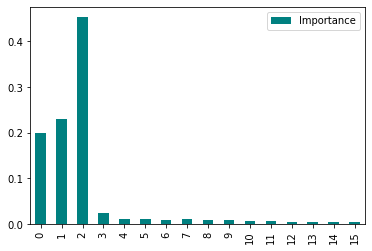

In [102]:
#plot the feature importance
df.plot.bar(color="teal")